In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter


from sklearn.ensemble import RandomForestClassifier



import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [134]:
df_train = pd.read_csv('/Users/CLEVO/Documents/datasets/train.csv')
df_test = pd.read_csv('/Users/CLEVO/Documents/datasets/test.csv')



In [132]:
df_train.drop(columns = ['Unnamed: 0','PhraseId','SentenceId'], inplace = True)

df_train.sample(5)

KeyError: "['Unnamed: 0' 'SentenceId'] not found in axis"

<AxesSubplot:xlabel='Sentiment'>

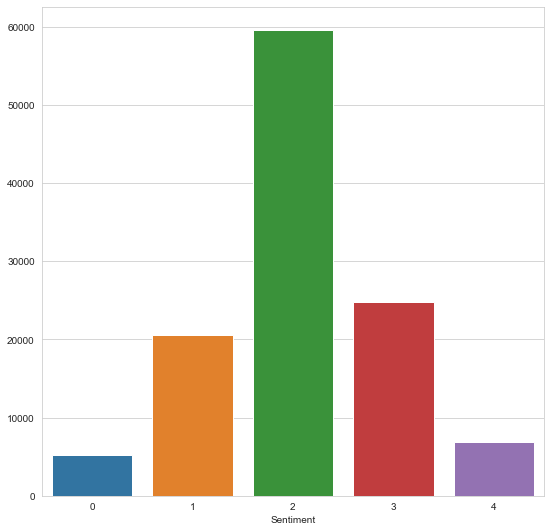

In [120]:
a = df_train.groupby(['Sentiment']).size()
plt.figure(figsize = (9,9))
sns.barplot(a.index, a.values)

In [121]:
import re 

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
#     text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
#     emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # Also Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower())) #+ ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

# Create some random texts for testing the function preprocessor()
print(preprocessor('I like it!!! |||<><>'))

i like it 


In [122]:

# Split a text into list of words
def tokenizer(text):
    return text.split()


In [138]:
###### from sklearn.model_selection import train_test_split

X = df_train['Phrase']
y = df_train['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

Xr = df_test['Phrase']


In [136]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=tokenizer,
                       preprocessor=preprocessor)
    
    

# A pipeline is what chains several steps together, once the initial exploration is done. 
# For example, some codes are meant to transform features — normalise numericals, or turn text into vectors, 
# or fill up missing data, they are transformers; other codes are meant to predict variables by fitting an algorithm,
# they are estimators. Pipeline chains all these together which can then be applied to training data
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0, multi_class='multinomial', verbose=1))])



clf.fit(X_train, y_train)

## class_weight = 'balanced'
# although the data set is not balanced. balancing the dataset through class_weight reduces accuracy
# 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s finished


Pipeline(steps=[('vect',
                 TfidfVectorizer(preprocessor=<function preprocessor at 0x00000000321015E8>,
                                 tokenizer=<function tokenizer at 0x0000000032101288>)),
                ('clf',
                 LogisticRegression(multi_class='multinomial', random_state=0,
                                    verbose=1))])

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
# Your code here
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.6346704259045666
confusion matrix:
 [[  197   498   284    29     1]
 [  144  1513  2246   175     8]
 [   28   637 10500   776    24]
 [    5   116  2349  2338   174]
 [    3    23   237   795   309]]
classification report:
               precision    recall  f1-score   support

           0       0.52      0.20      0.28      1009
           1       0.54      0.37      0.44      4086
           2       0.67      0.88      0.76     11965
           3       0.57      0.47      0.51      4982
           4       0.60      0.23      0.33      1367

    accuracy                           0.63     23409
   macro avg       0.58      0.43      0.47     23409
weighted avg       0.62      0.63      0.61     23409



Text(0.5, 16.0, 'Predicted label')

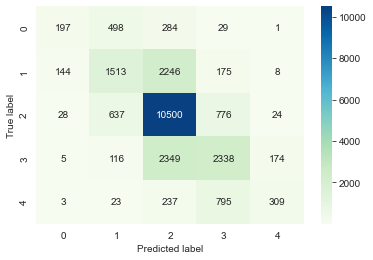

In [126]:
cm = confusion_matrix(y_test, predictions)
# view with a heatmap
sns.heatmap(cm, annot=True,fmt='g', cmap='GnBu', xticklabels=['0','1','2','3','4'], yticklabels=['0','1','2','3','4'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

# positive, slightly positive, neutral, slightly negative, or negative)

In [127]:
#break down into 5 seperate dataframes
df_train_0_category = df_train[df_train.Sentiment == 0]
df_train_1_category = df_train[df_train.Sentiment == 1]
df_train_2_category = df_train[df_train.Sentiment == 2]
df_train_3_category = df_train[df_train.Sentiment == 3]
df_train_4_category = df_train[df_train.Sentiment == 4]



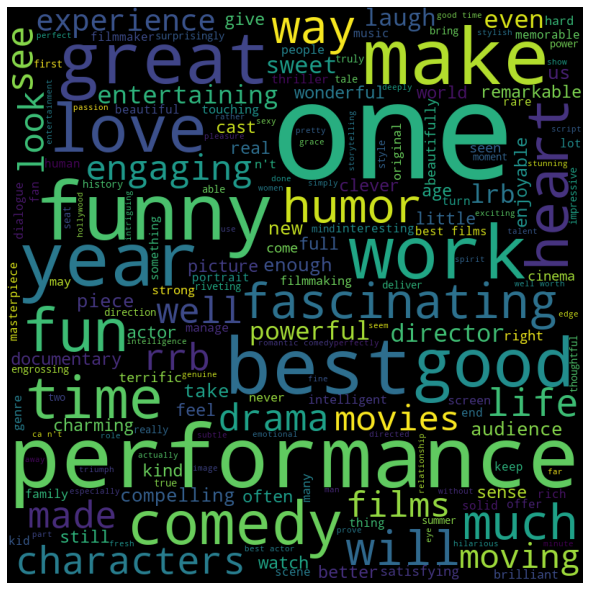

In [151]:
from wordcloud import WordCloud, STOPWORDS 


comment_words = '' 
stopwords = set(STOPWORDS)
newstopwords = ['movie','film','Character','story']

for i in newstopwords:
        stopwords.add(i)

#WordCloud

for val in df_train_4_category.Phrase:
    val = str(val)
    tokens = val.split()
       
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words +=" ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='Black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
    

<class 'set'>


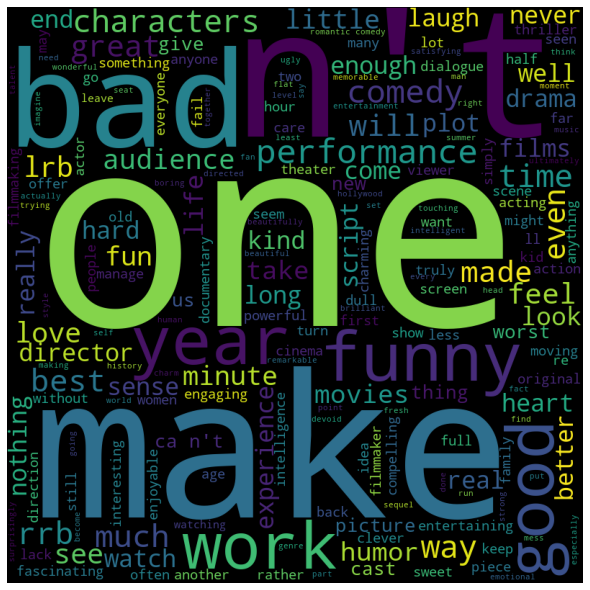

In [129]:
for val in df_train_0_category.Phrase:
    val = str(val)
    tokens = val.split()
       
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words +=" ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='Black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
    

In [139]:
testpredictions = clf.predict(Xr)

In [146]:
df_test['Sentiment Prediction'] = testpredictions.tolist()

In [150]:
df_test.sample(5)

,PhraseId,Phrase,Sentiment Prediction
22281,22281,"writing , skewed characters , and",1
1143,1143,Nesbitt 's,2
12137,12137,blood-curdling,2
1043,1043,in world cinema,2
32556,32556,inconsistent and,0


In [152]:
df_test.to_csv('/Users/CLEVO/Documents/datasets/submission.csv')